**Install required packages**

In [1]:
!pip install mediapipe opencv-python-headless scikit-learn pandas numpy matplotlib seaborn -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
import joblib

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier ,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report,
                              confusion_matrix, ConfusionMatrixDisplay,
                              precision_score, recall_score, f1_score)
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.rcParams['figure.dpi'] = 120
sns.set_theme(style='whitegrid', palette='Set2')
print('All libraries imported successfully')

All libraries imported successfully


# **Data Loading & Visualization**

**Load Dataset**

In [3]:
Data_Path = "/content/hand_landmarks_data.csv"
df = pd.read_csv(Data_Path , sep ="," , header = 0 ,encoding = "utf-8")
print("Hand Landmarks Dataset Loaded Successfully")

Hand Landmarks Dataset Loaded Successfully


In [4]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (25675, 64)


In [5]:
print(f'Columns (first 10): {df.columns.tolist()[:10]} ...')
df.head()

Columns (first 10): ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4'] ...


,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [6]:
print('\n Dataset Info:')
print(f'  Total samples : {len(df):,}')
print(f'  Total features: {df.shape[1] - 1}')
print(f'  Label column  : {df.columns[-1]}')
print(f'  Classes       : {df[df.columns[-1]].nunique()}')


 Dataset Info:
  Total samples : 25,675
  Total features: 63
  Label column  : label
  Classes       : 18


In [7]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [8]:
print(df.dtypes)

x1       float64
y1       float64
z1       float64
x2       float64
y2       float64
          ...   
z20      float64
x21      float64
y21      float64
z21      float64
label     object
Length: 64, dtype: object


In [9]:
print("\nDataset Info:")
print("-" * 50)
df.info()


Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7    

In [10]:
Missing_Values = df.isnull().sum()
Total_Missing = Missing_Values.sum()
print("Total Missing Values:", Total_Missing)

Total Missing Values: 0


**Class Distribution**

In [11]:
df['label'].unique()

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

In [12]:
label_column = "label"
class_counts = df[label_column].value_counts()
print("\nClass Counts:")
display(class_counts)


Class Counts:


,count
label,
three2,1653
palm,1649
four,1634
ok,1592
stop_inverted,1567
call,1506
peace_inverted,1497
stop,1482
rock,1458


**Visualize Class Imbalance**

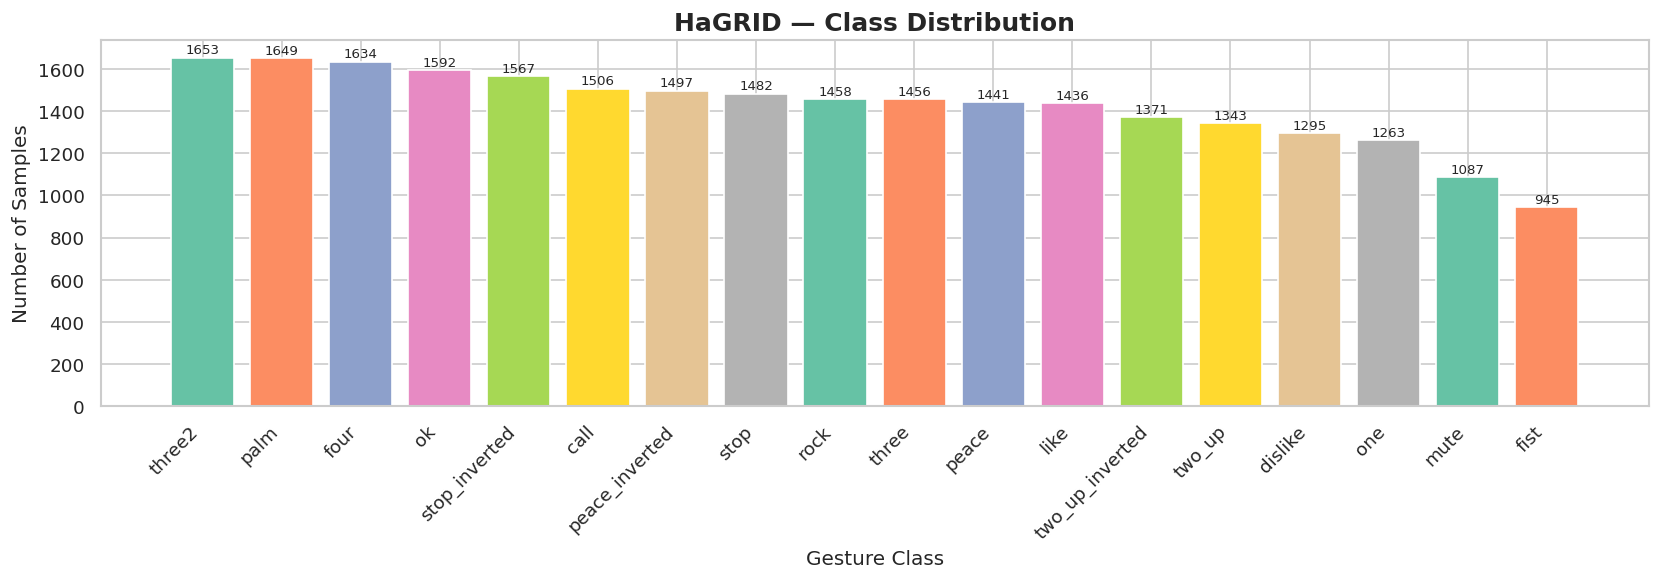

In [13]:
label_col = df.columns[-1]
counts = df[label_col].value_counts()

fig, ax = plt.subplots(figsize=(14, 5))
bars = ax.bar(counts.index, counts.values, color=sns.color_palette('Set2', len(counts)))
ax.set_title('HaGRID — Class Distribution', fontsize=15, fontweight='bold')
ax.set_xlabel('Gesture Class')
ax.set_ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
for bar, val in zip(bars, counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            str(val), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

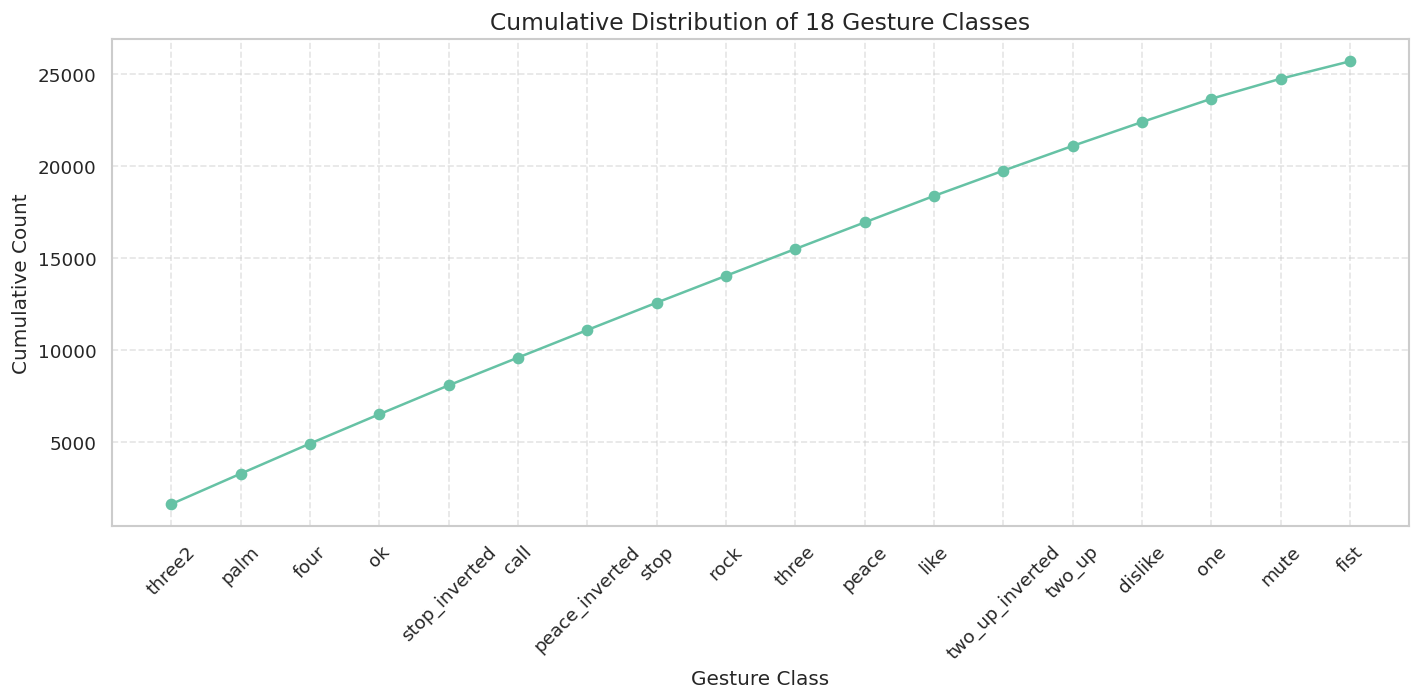

In [14]:
plt.figure(figsize=(12,6))
plt.plot(
    class_counts.sort_values(ascending=False).cumsum().values,
    marker='o', linestyle='-'
)
plt.xticks(range(18), class_counts.sort_values(ascending=False).index, rotation=45)
plt.title("Cumulative Distribution of 18 Gesture Classes", fontsize=14)
plt.ylabel("Cumulative Count")
plt.xlabel("Gesture Class")
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


**Hand Landmark Visualization**

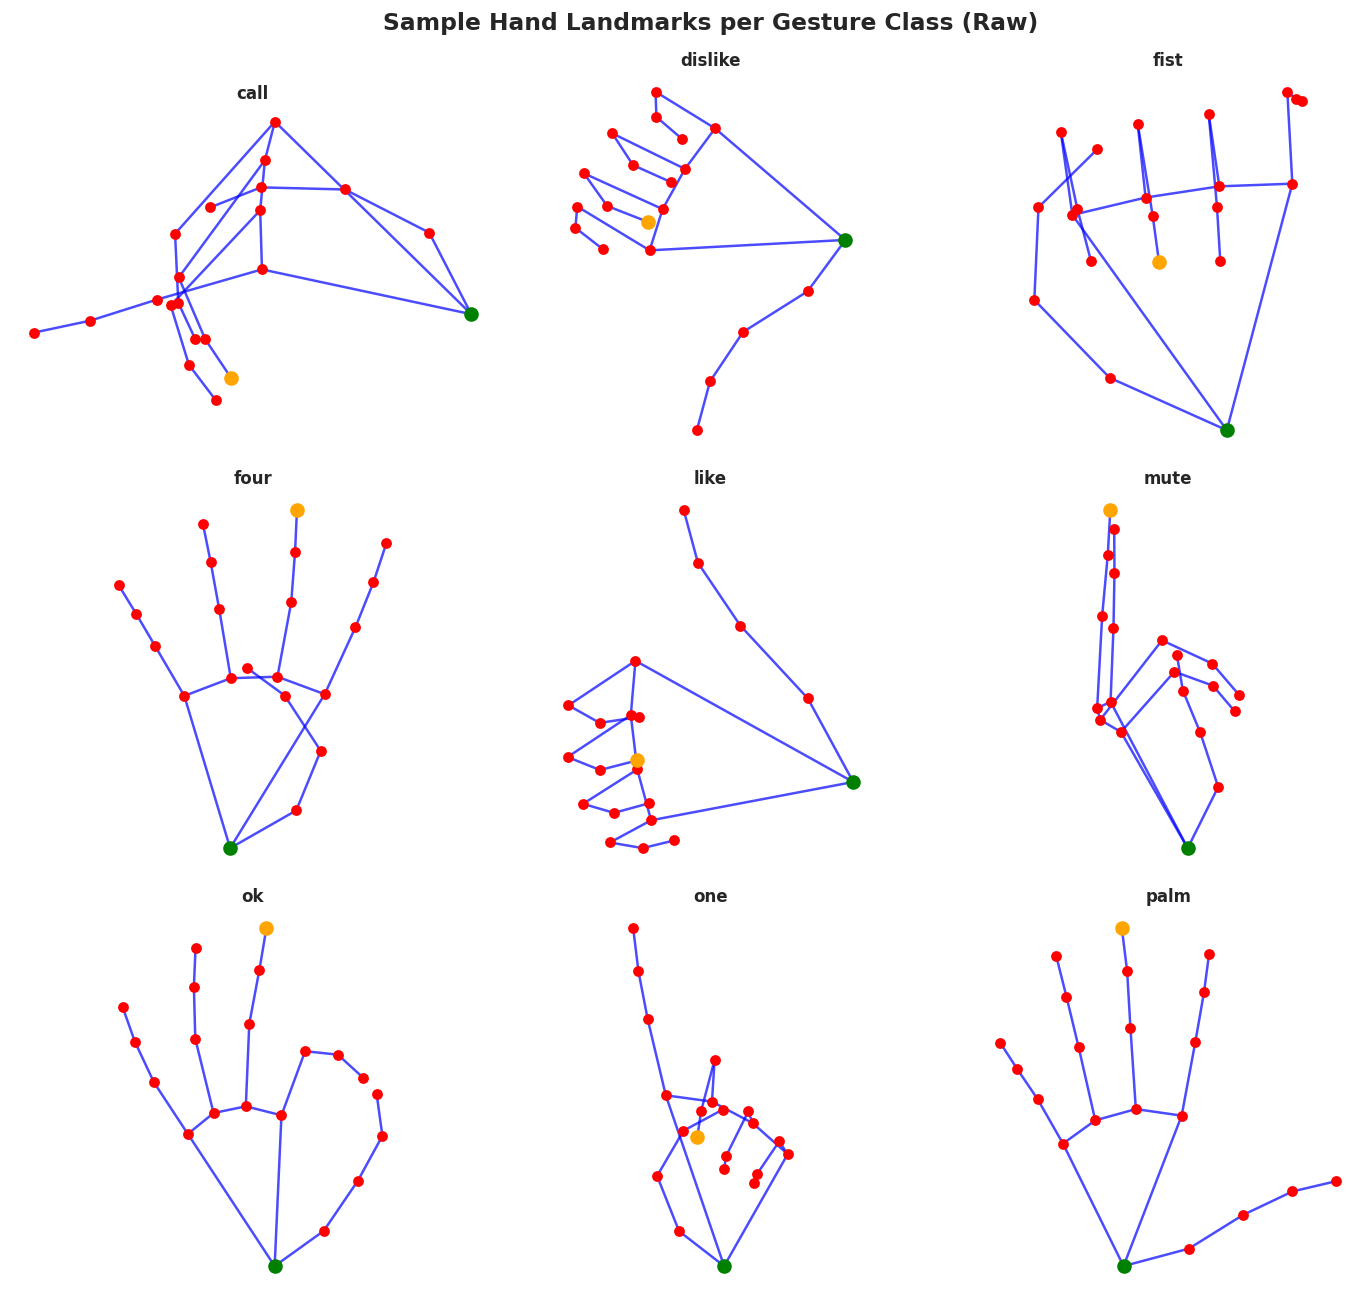

In [15]:
HAND_CONNECTIONS = [
    (0,1),(1,2),(2,3),(3,4),          # Thumb
    (0,5),(5,6),(6,7),(7,8),          # Index
    (5,9),(9,10),(10,11),(11,12),     # Middle
    (9,13),(13,14),(14,15),(15,16),   # Ring
    (13,17),(17,18),(18,19),(19,20),  # Pinky
    (0,17)
]

def plot_hand(ax, row, title=''):
    """Plot a single hand landmark sample."""
    xs = [row[f'x{i}'] for i in range(1,22)]
    ys = [row[f'y{i}'] for i in range(1,22)]
    for start, end in HAND_CONNECTIONS:
        ax.plot([xs[start], xs[end]], [ys[start], ys[end]], 'b-', linewidth=1.5, alpha=0.7)
    ax.scatter(xs, ys, c='red', s=30, zorder=5)
    ax.scatter(xs[0], ys[0], c='green', s=60, zorder=6, label='Wrist')  # wrist
    ax.scatter(xs[12], ys[12], c='orange', s=60, zorder=6, label='Mid-tip')  # mid tip
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.axis('off')


classes = df[label_col].unique()[:9]
fig, axes = plt.subplots(3, 3, figsize=(12, 11))
fig.suptitle('Sample Hand Landmarks per Gesture Class (Raw)', fontsize=14, fontweight='bold')

for ax, cls in zip(axes.flatten(), classes):
    sample = df[df[label_col] == cls].iloc[0]
    plot_hand(ax, sample, title=cls)

plt.tight_layout()
plt.show()

In [16]:
row = df.iloc[[11480]]
row

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
11480,278.986771,244.294017,1.833548e-07,262.584846,238.484642,-0.012291,248.78167,229.453519,-0.020595,238.278488,...,299.239471,199.822577,-0.037286,303.200317,192.854725,-0.041019,306.615715,186.865053,-0.043507,palm


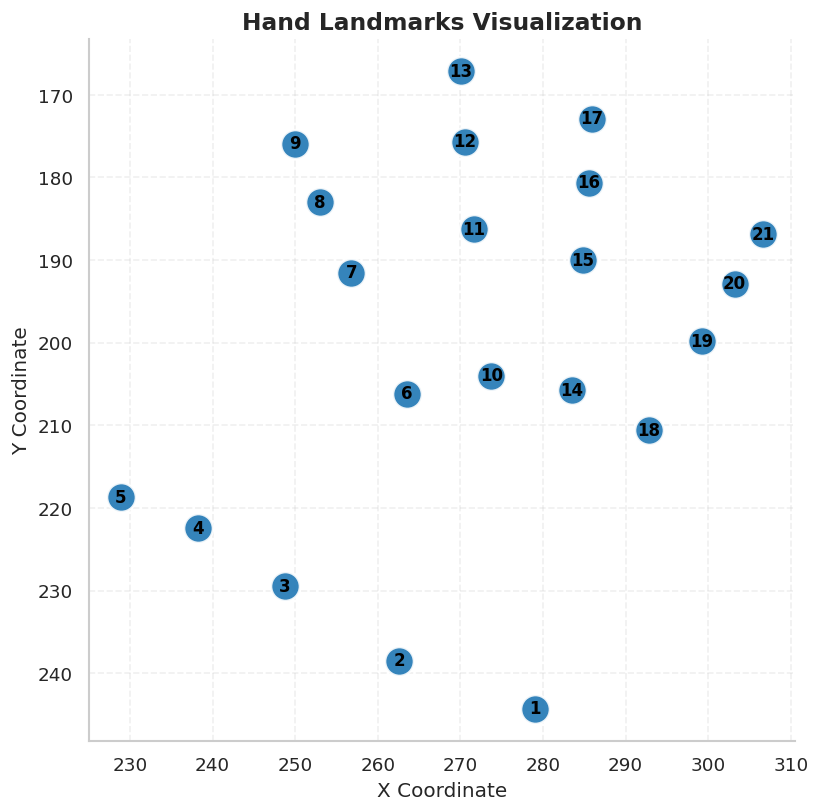

In [17]:
x_values = [row[f'x{i}'].values[0] for i in range(1, 22)]
y_values = [row[f'y{i}'].values[0] for i in range(1, 22)]

plt.figure(figsize=(7, 7))
plt.scatter(
    x_values,
    y_values,
    s=300,
    c="#1f77b4",
    edgecolors="white",
    linewidth=1.5,
    alpha=0.9
)


for i in range(21):
    plt.text(
        x_values[i],
        y_values[i],
        str(i+1),
        fontsize=10,
        weight='bold',
        ha='center',
        va='center',
        color='black'
    )

plt.xlabel("X Coordinate", fontsize=12)
plt.ylabel("Y Coordinate", fontsize=12)
plt.title("Hand Landmarks Visualization", fontsize=14, weight='bold')

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')  # Keep proportions correct

plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

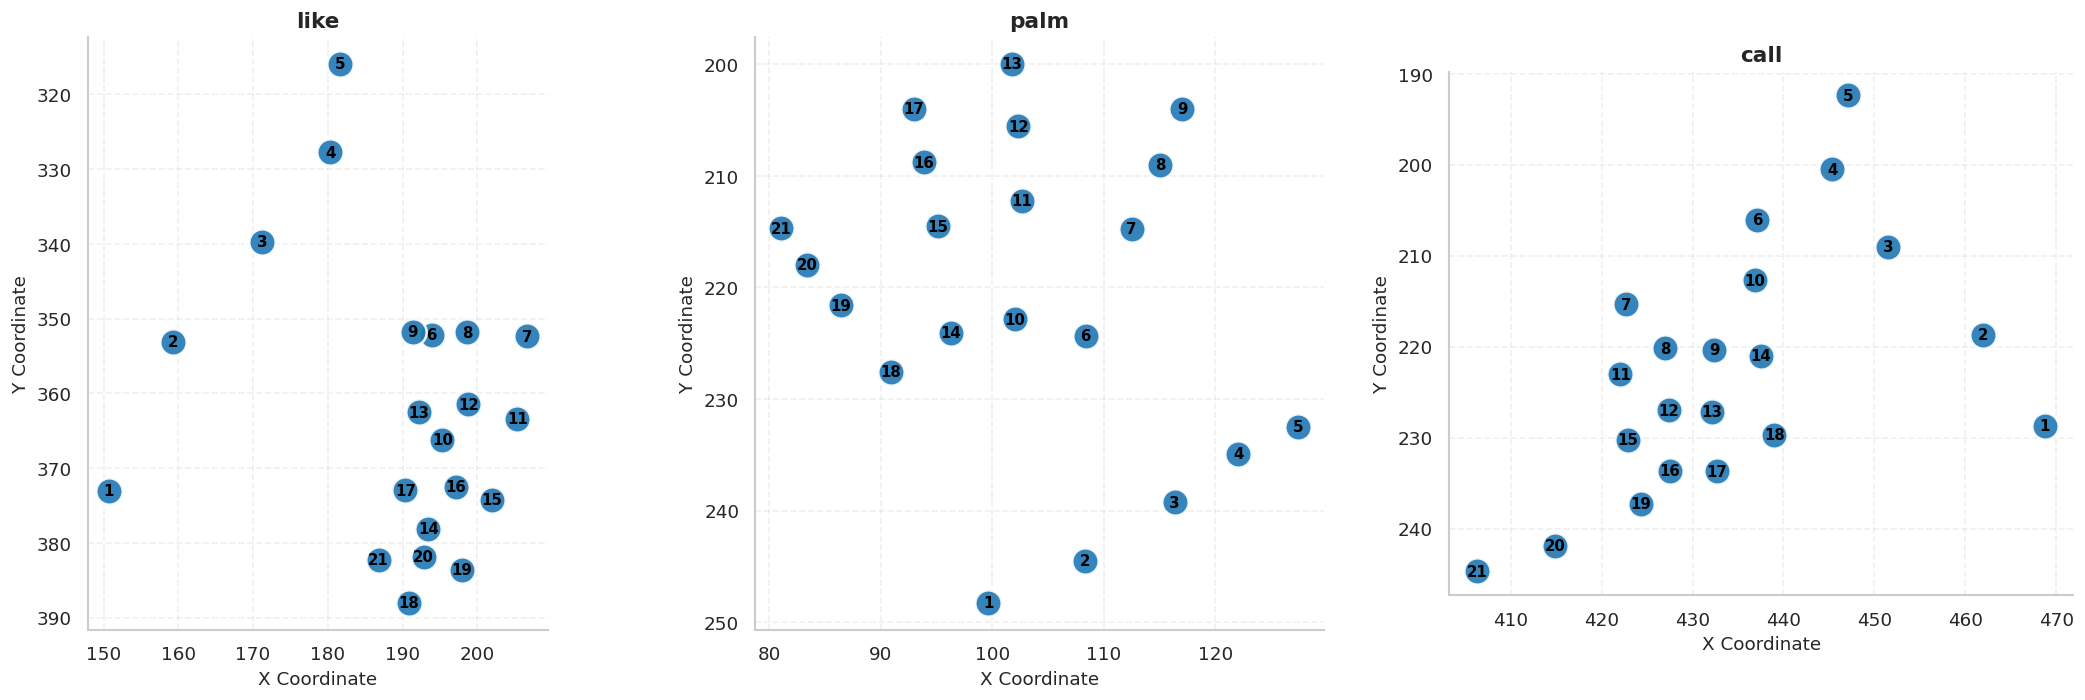

In [18]:
rows = df.iloc[[6100, 12000,1500]]
plt.figure(figsize=(18, 6))

for idx, (_, row_data) in enumerate(rows.iterrows()):

    x_values = [row_data[f'x{i}'] for i in range(1, 22)]
    y_values = [row_data[f'y{i}'] for i in range(1, 22)]

    plt.subplot(1, 3, idx + 1)

    plt.scatter(
        x_values,
        y_values,
        s=250,
        c="#1f77b4",
        edgecolors="white",
        linewidth=1.5,
        alpha=0.9
    )

    for i in range(21):
        plt.text(
            x_values[i],
            y_values[i],
            str(i+1),
            fontsize=9,
            weight='bold',
            ha='center',
            va='center',
            color='black'
        )

    plt.xlabel("X Coordinate", fontsize=11)
    plt.ylabel("Y Coordinate", fontsize=11)
    plt.title(f"{row_data['label']}",fontsize=13, weight='bold')
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# **Data Preprocessing**

**Recentering & Normalization**

In [19]:
def normalize_landmarks(df):
    """
    Normalize hand landmarks:
      1. Translate so wrist (landmark 1) is at origin
      2. Scale by middle-finger tip (landmark 13) distance from origin
      z coordinates are kept as-is (already normalized by MediaPipe)
    """
    df_norm = df.copy()
    label_col = df.columns[-1]

    for i in range(1,22):

        df_norm[f'x{i}'] = df[f'x{i}'] - df['x1']
        df_norm[f'y{i}'] = df[f'y{i}'] - df['y1']


    scale = np.sqrt(df_norm['x13']**2 + df_norm['y13']**2)
    scale = scale.replace(0, 1e-6)

    for i in range(1,22):
        df_norm[f'x{i}'] = df_norm[f'x{i}'] / scale
        df_norm[f'y{i}'] = df_norm[f'y{i}'] / scale


    return df_norm

In [20]:
df_norm = normalize_landmarks(df)
print('Normalization complete')
print(f'Sample wrist after normalization :   x1    = {df_norm["x1"].iloc[0]:.4f} ,  y1  = {df_norm["y1"].iloc[0]:.4f}')
print(f'Sample mid-tip after normalization : x13   = {df_norm["x13"].iloc[0]:.4f},  y13 = {df_norm["y13"].iloc[0]:.4f}')

Normalization complete
Sample wrist after normalization :   x1    = 0.0000 ,  y1  = 0.0000
Sample mid-tip after normalization : x13   = -0.9667,  y13 = 0.2558


In [21]:
df_norm.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486,call


**Visualize Hand Landmarks After Normalization**

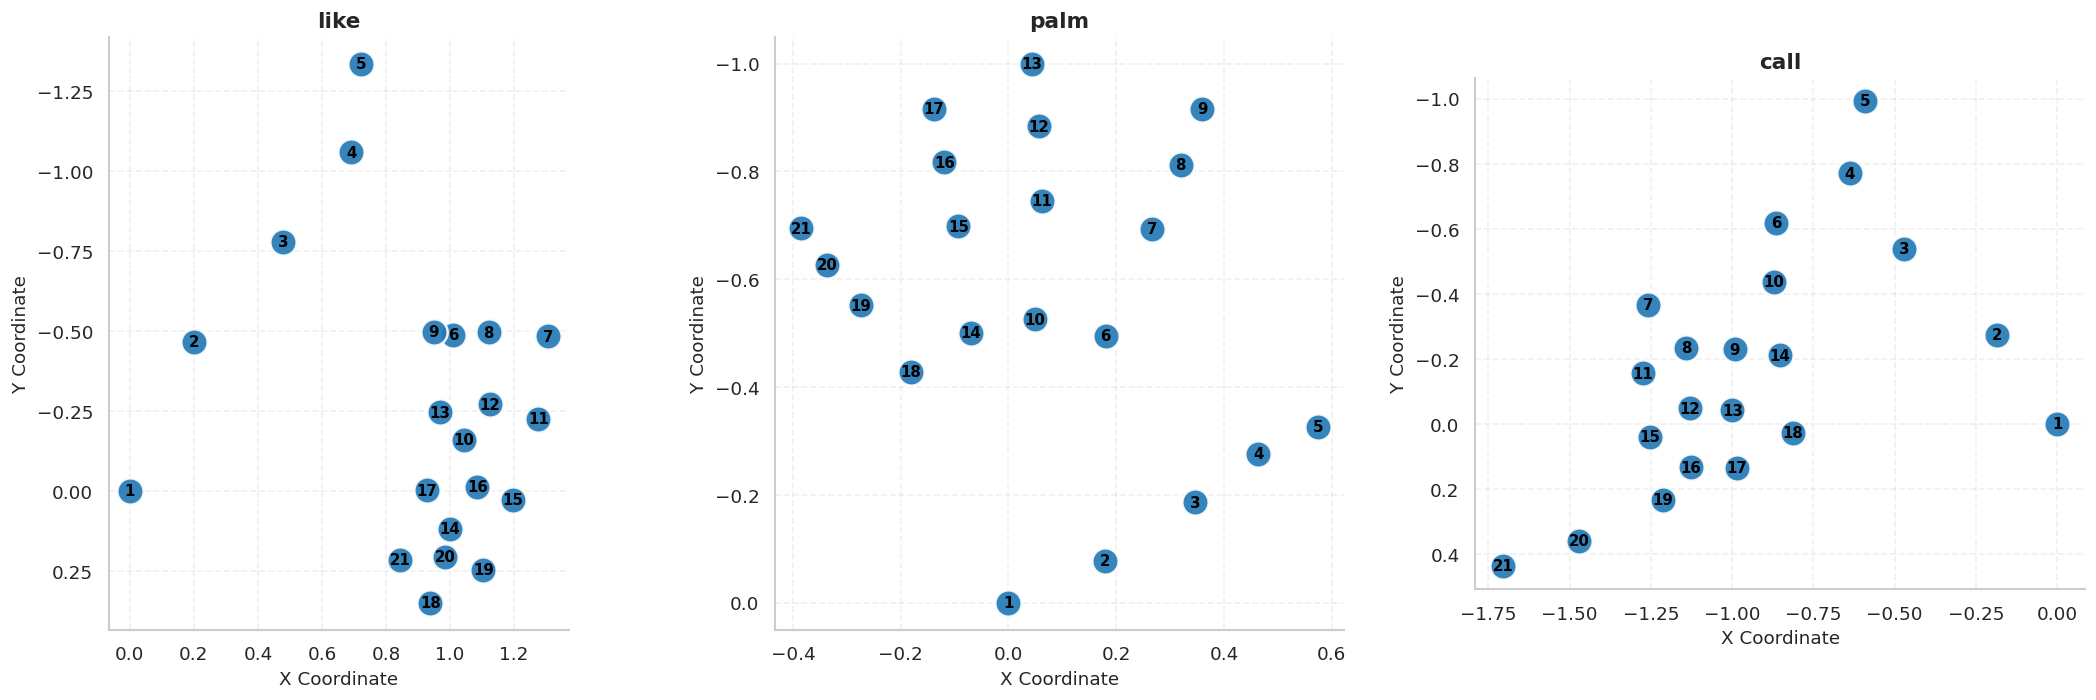

In [22]:
rows = df_norm.iloc[[6100, 12000,1500]]
plt.figure(figsize=(18, 6))

for idx, (_, row_data) in enumerate(rows.iterrows()):

    x_values = [row_data[f'x{i}'] for i in range(1, 22)]
    y_values = [row_data[f'y{i}'] for i in range(1, 22)]

    plt.subplot(1, 3, idx + 1)

    plt.scatter(
        x_values,
        y_values,
        s=250,
        c="#1f77b4",
        edgecolors="white",
        linewidth=1.5,
        alpha=0.9
    )

    for i in range(21):
        plt.text(
            x_values[i],
            y_values[i],
            str(i+1),
            fontsize=9,
            weight='bold',
            ha='center',
            va='center',
            color='black'
        )

    plt.xlabel("X Coordinate", fontsize=11)
    plt.ylabel("Y Coordinate", fontsize=11)
    plt.title(f"{row_data['label']}",fontsize=13, weight='bold')
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')

    plt.grid(True, linestyle="--", alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

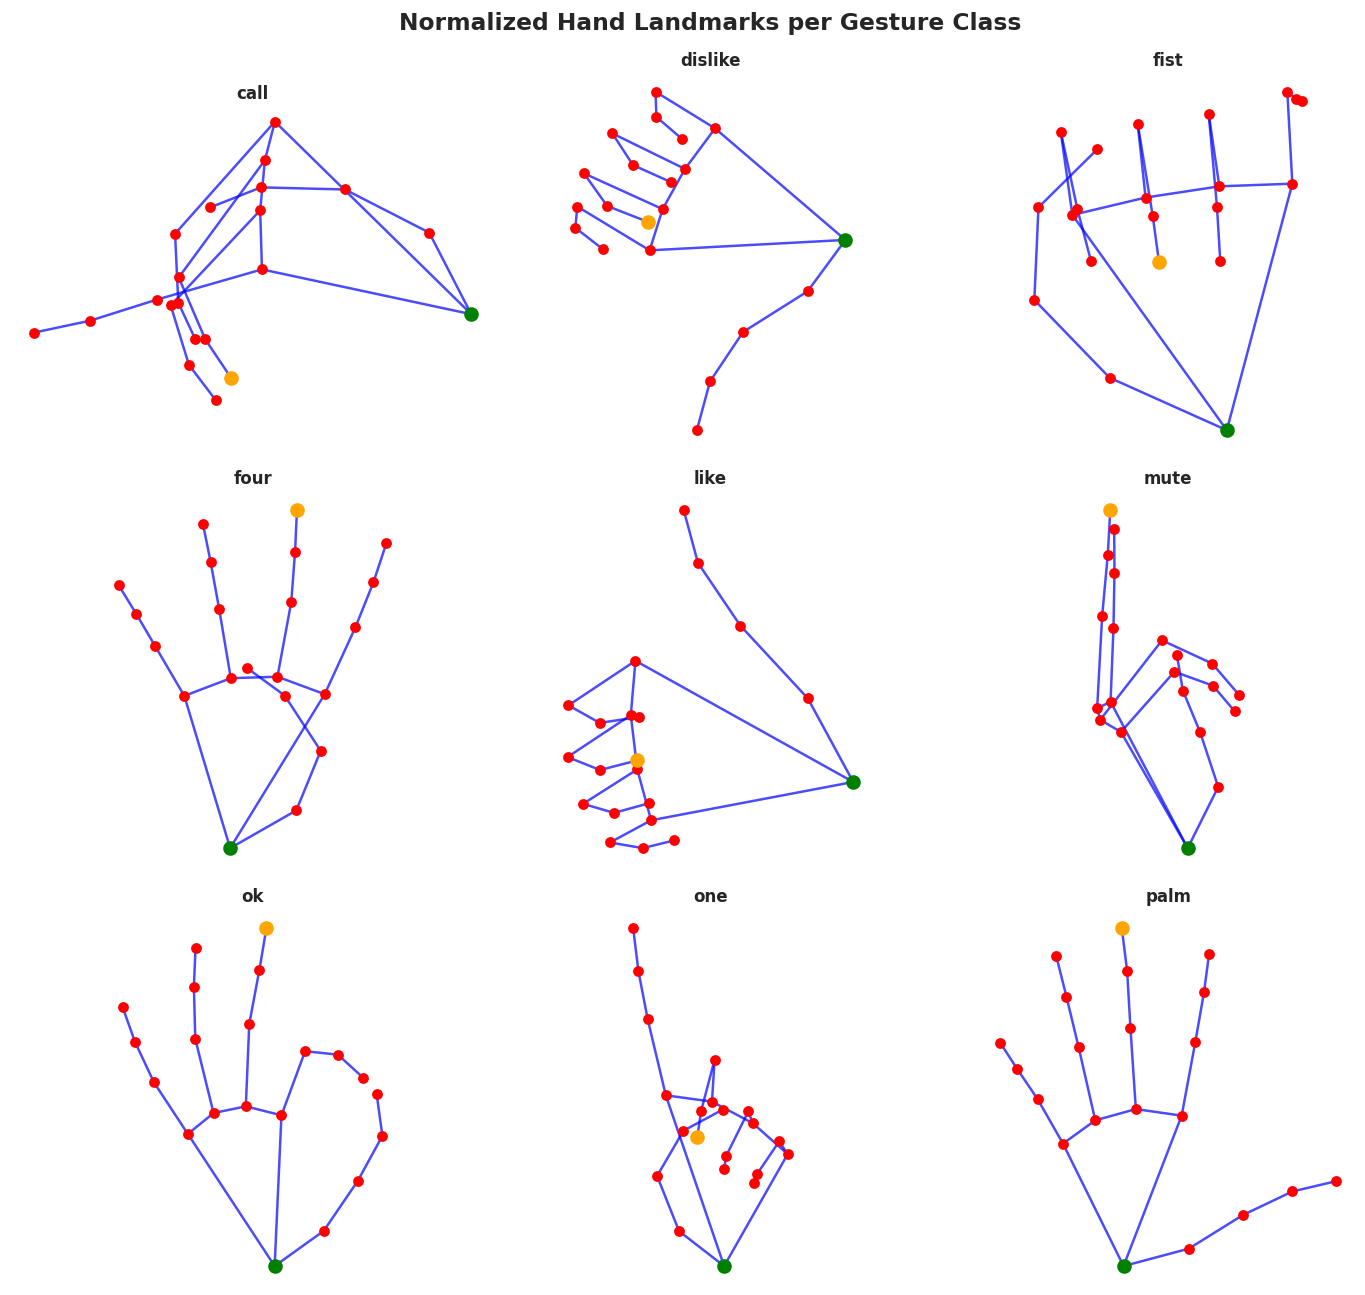

In [23]:
classes = df_norm[label_col].unique()[:9]
fig, axes = plt.subplots(3, 3, figsize=(12, 11))
fig.suptitle('Normalized Hand Landmarks per Gesture Class', fontsize=14, fontweight='bold')

for ax, cls in zip(axes.flatten(), classes):
    sample = df_norm[df_norm[label_col] == cls].iloc[0]
    plot_hand(ax, sample, title=cls)

plt.tight_layout()
plt.show()

**Features / Label Split**

In [24]:
feature_cols = [c for c in df_norm.columns if c != label_col]
X = df_norm[feature_cols].values
y_raw = df_norm[label_col].values

In [25]:
print(f"X Shape: {X.shape}")
print(f"y Shape: {y_raw.shape}")

X Shape: (25675, 63)
y Shape: (25675,)


**Encode labels**

In [26]:
encoder = LabelEncoder()
y = encoder.fit_transform(y_raw)
print("Unique encoded labels:")
print(np.unique(y))

Unique encoded labels:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [27]:
print(f"\nLabel Mapping:\n")
for i, label in enumerate(encoder.classes_):
    print(f"class {label} --> {i}")


Label Mapping:

class call --> 0
class dislike --> 1
class fist --> 2
class four --> 3
class like --> 4
class mute --> 5
class ok --> 6
class one --> 7
class palm --> 8
class peace --> 9
class peace_inverted --> 10
class rock --> 11
class stop --> 12
class stop_inverted --> 13
class three --> 14
class three2 --> 15
class two_up --> 16
class two_up_inverted --> 17


**Save Encoder**

In [28]:
joblib.dump(encoder,"label_encoder.pkl")
print("Label Encoder saved successfully")

Label Encoder saved successfully


**Train / Test Split**

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8 , test_size = 0.2, random_state = 42, stratify = y)
print(f'Training samples : {X_train.shape[0]:,}')
print(f'Testing  samples : {X_test.shape[0]:,}')

Training samples : 20,540
Testing  samples : 5,135


In [30]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20540, 63)
y_train shape: (20540,)
X_test shape: (5135, 63)
y_test shape: (5135,)


**Save Train & Test Data and Labels**

In [31]:
joblib.dump(
    {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    },
    "dataset_splits.pkl"
)

print("Dataset splits saved successfully")

Dataset splits saved successfully


# **Models Training & Evaluation**

In [32]:
# Train Logistic Regression Model

lr_model = LogisticRegression(multi_class = 'multinomial',max_iter = 500, class_weight = 'balanced').fit(X_train, y_train)
lr_model_score = lr_model.score(X_test, y_test)
lr_model_ypred = lr_model.predict(X_test)

In [33]:
# Train Decision Tree Model

dt_model = DecisionTreeClassifier(class_weight = 'balanced').fit(X_train, y_train)
dt_model_score = dt_model.score(X_test, y_test)
dt_model_ypred = dt_model.predict(X_test)

In [34]:
# Train SVM Model

svm_model = SVC(class_weight = 'balanced').fit(X_train, y_train)
svm_model_score = svm_model.score(X_test, y_test)
svm_model_ypred = svm_model.predict(X_test)

In [35]:
# Train K-Nearest Neighbors model

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_model_score = knn_model.score(X_test, y_test)
knn_model_ypred = knn_model.predict(X_test)

In [36]:
# Train Random Forest Model

rf_model = RandomForestClassifier(class_weight ='balanced').fit(X_train, y_train)
rf_model_score = rf_model.score(X_test, y_test)
rf_model_ypred = rf_model.predict(X_test)

In [37]:
# Train XGBoost

xgb_model = XGBClassifier(n_jobs=-1).fit(X_train, y_train)
xgb_model_score = xgb_model.score(X_test, y_test)
xgb_model_ypred = xgb_model.predict(X_test)

In [38]:
def evaluate_and_save_models(y_true, models_predictions, output_path = "Models_Evaluation_Results.csv"):

    results = []
    for model_name, y_pred in models_predictions.items():
        results.append({
            "Model": model_name,
            "Accuracy": accuracy_score(y_true, y_pred),
            "F1_Score": f1_score(y_true, y_pred, average = "weighted"),
            "Precision": precision_score(y_true, y_pred, average = "weighted"),
            "Recall": recall_score(y_true, y_pred, average = "weighted")
        })

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by = "F1_Score", ascending = False).reset_index(drop = True)
    results_df = results_df.round(4)
    results_df.to_csv(output_path, index = False)

    print(f"Results saved successfully to '{output_path}'")
    return results_df

In [39]:
models_predictions = {
    "Logistic Regression": lr_model_ypred,
    "Decision Tree": dt_model_ypred,
    "SVM": svm_model_ypred,
    "KNN": knn_model_ypred,
    "Random Forest": rf_model_ypred,
    "XGBoost": xgb_model_ypred,

}

results_df = evaluate_and_save_models(y_test,
                                      models_predictions,
                                      "model_comparison_results.csv")

results_df

Results saved successfully to 'model_comparison_results.csv'


,Model,Accuracy,F1_Score,Precision,Recall
0,XGBoost,0.9834,0.9835,0.9836,0.9834
1,Random Forest,0.9776,0.9777,0.9778,0.9776
2,KNN,0.9772,0.9772,0.9774,0.9772
3,Decision Tree,0.9513,0.9514,0.9516,0.9513
4,SVM,0.9278,0.9271,0.9343,0.9278
5,Logistic Regression,0.8555,0.8551,0.8574,0.8555


XGBoost is the best performing model based on Accuracy, F1, Precision and Recall

Ensemble models (XGBoost, Random Forest) outperform simpler models (Decision Tree, SVM, Logistic Regression)

**Model Performance Evaluation (Train vs Test Comparison)**

In [40]:
def compute_metrics(models, X_train, X_test, y_train, y_test):

    metrics = {}
    for name, model in models.items():

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        metrics[name] = {
            "train_accuracy": accuracy_score(y_train, y_train_pred),
            "test_accuracy": accuracy_score(y_test, y_test_pred),

            "train_f1": f1_score(y_train, y_train_pred, average = "weighted"),
            "test_f1": f1_score(y_test, y_test_pred, average = "weighted"),

            "train_precision": precision_score(y_train, y_train_pred, average = "weighted"),
            "test_precision": precision_score(y_test, y_test_pred, average = "weighted"),

            "train_recall": recall_score(y_train, y_train_pred, average = "weighted"),
            "test_recall": recall_score(y_test, y_test_pred, average = "weighted"),
        }

    return metrics

In [41]:
def plot_metric(models, train_values, test_values, metric_name):

    x = np.arange(len(models))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, train_values, width, label="Train")
    plt.bar(x + width/2, test_values, width, label="Test")

    plt.xticks(x, models, rotation=45)
    plt.ylabel(metric_name)
    plt.title(f"{metric_name}: Train vs Test")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [42]:
def visualize_all_metrics(models, metrics):

    model_names = list(models.keys())

    # Accuracy
    plot_metric(
        model_names,
        [metrics[m]["train_accuracy"] for m in model_names],
        [metrics[m]["test_accuracy"] for m in model_names],
        "Accuracy"
    )

    # F1 Score
    plot_metric(
        model_names,
        [metrics[m]["train_f1"] for m in model_names],
        [metrics[m]["test_f1"] for m in model_names],
        "F1 Score"
    )

    # Precision
    plot_metric(
        model_names,
        [metrics[m]["train_precision"] for m in model_names],
        [metrics[m]["test_precision"] for m in model_names],
        "Precision"
    )

    # Recall
    plot_metric(
        model_names,
        [metrics[m]["train_recall"] for m in model_names],
        [metrics[m]["test_recall"] for m in model_names],
        "Recall"
    )

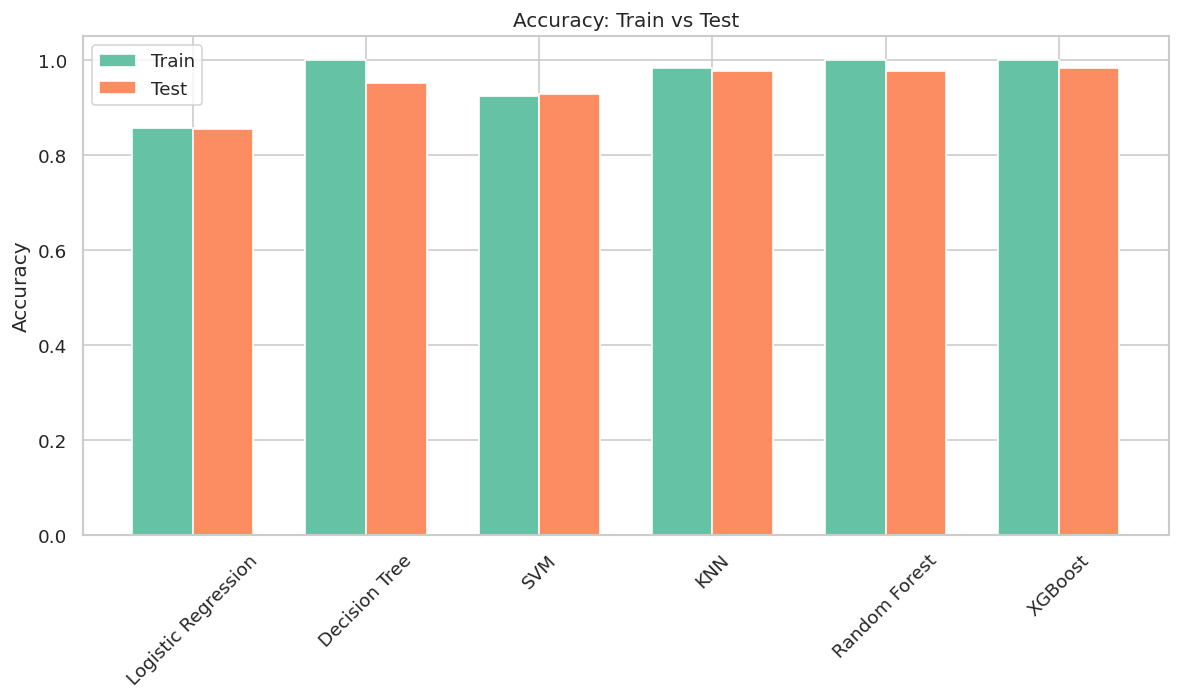

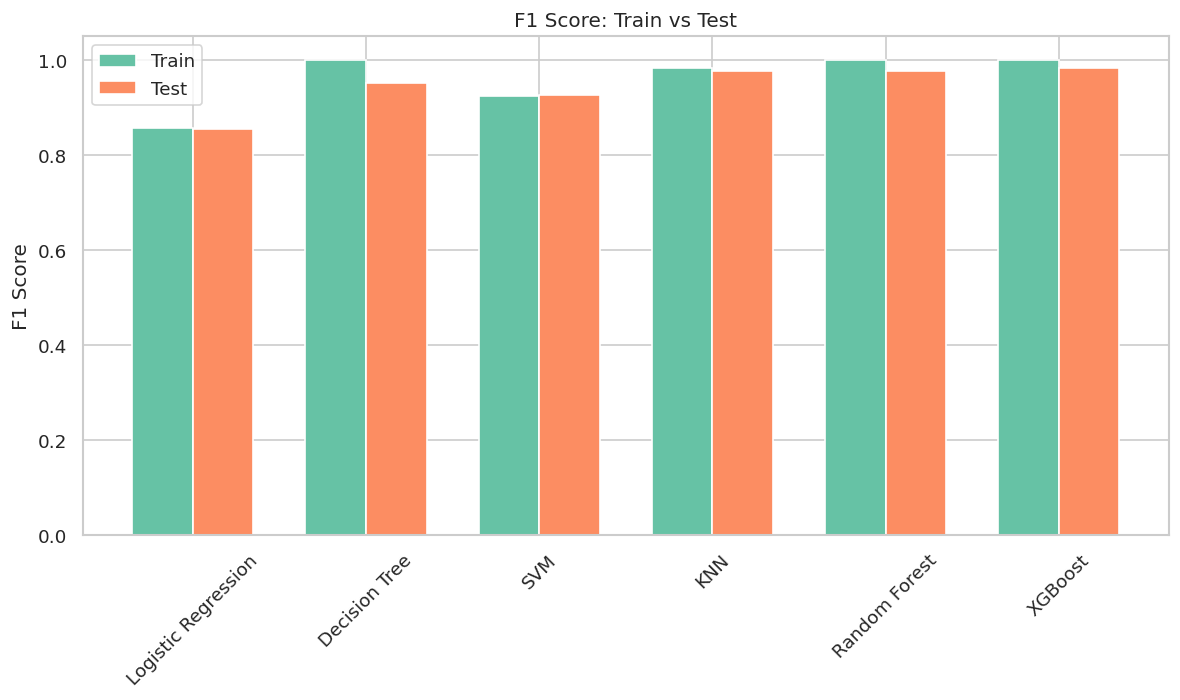

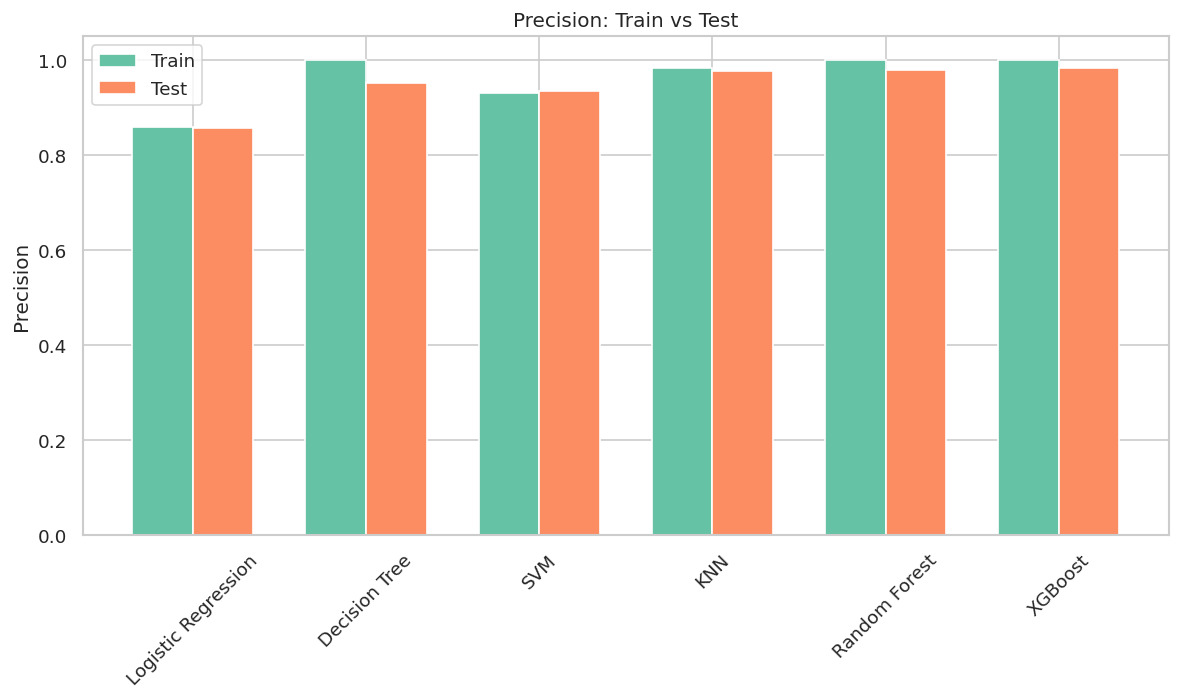

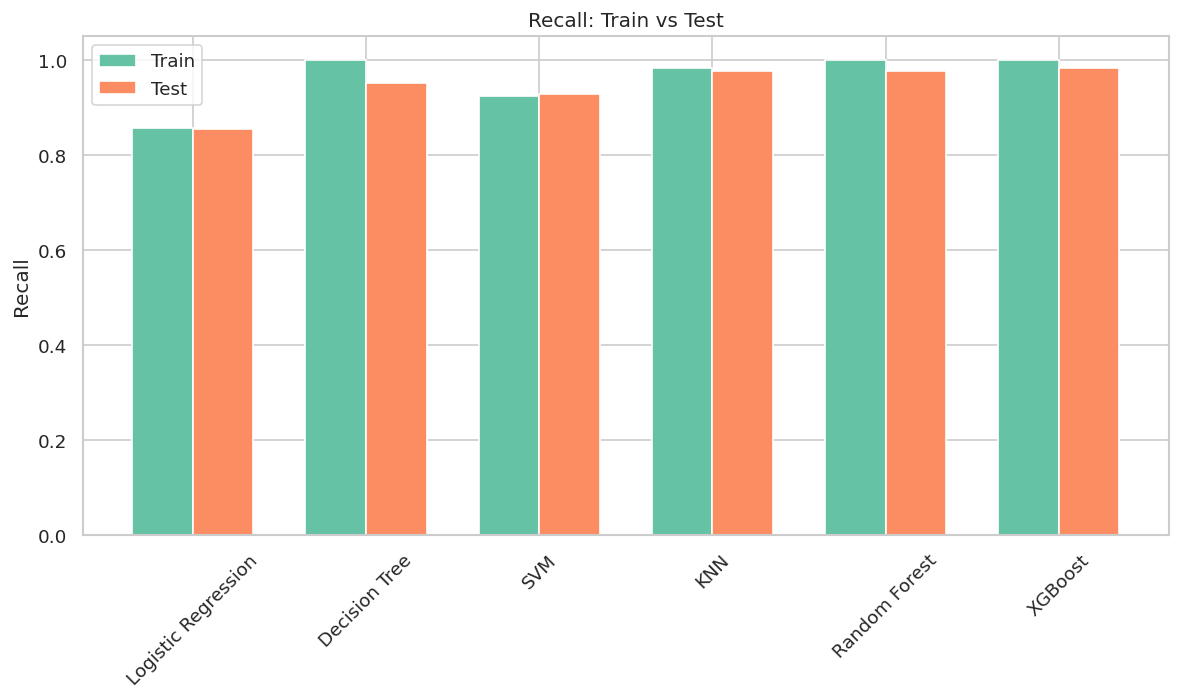

In [43]:
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
}

metrics = compute_metrics(models, X_train, X_test, y_train, y_test)
visualize_all_metrics(models, metrics)

**Dumbbell Plot (for Model Comparison)**

to compare training vs test accuracy for each model

In [44]:
def plot_dumbbell(metrics, metric_name="test_accuracy"):
    df = pd.DataFrame(metrics).T.reset_index()
    df.rename(columns={"index": "Model"}, inplace=True)


    plt.figure(figsize=(8, len(df)*0.6))
    for idx, row in df.iterrows():
        plt.plot([row[f"train_{metric_name}"], row[f"test_{metric_name}"]],
                 [idx, idx], color='gray', linewidth=2, zorder=1)


    plt.scatter(df[f"train_{metric_name}"], df.index, color='blue', s=100, label='Train', zorder=2)
    plt.scatter(df[f"test_{metric_name}"], df.index, color='red', s=100, label='Test', zorder=2)


    plt.yticks(df.index, df["Model"])
    plt.xlabel(metric_name.replace("_", " ").title())
    plt.title(f"Dumbbell Plot of {metric_name.replace('_', ' ').title()}")
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

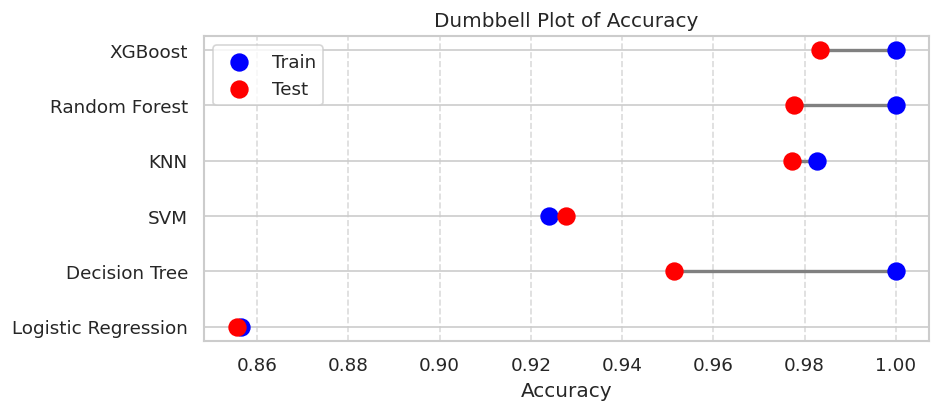

In [45]:
plot_dumbbell(metrics, metric_name="accuracy")

In [46]:
# Save XGBoost Model
joblib.dump(xgb_model, "xgb_model.pkl")

['xgb_model.pkl']

# **Grid search**

In [47]:
# SVM

from sklearn.model_selection import GridSearchCV
svm_parameters = {'kernel': ['rbf'],
                  'C': [100],
                  'gamma': [0.01, 0.1]
                }

svm = SVC(class_weight ='balanced')
svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)

svm_winner =svm_gs.fit(X_train, y_train)
svm_winner.score(X_test, y_test)

0.9894839337877313

In [48]:
# Train Support Vector Machine model with the best hyperparameters

svm_final =SVC(C=100, class_weight='balanced', gamma = 0.1).fit(X_train, y_train)
svm_final_model_score=svm_final.score(X_test, y_test)
svm_final_model_ypred=svm_final.predict(X_test)

print("SVM accuracy : ", svm_final_model_score )
print("SVM f1 score : ", f1_score(y_test, svm_final_model_ypred, average = "weighted") )
print("SVM recall score : ", recall_score(y_test, svm_final_model_ypred , average = "weighted") )
print("SVM precision score :", precision_score(y_test, svm_final_model_ypred , average = "weighted") )

SVM accuracy :  0.9894839337877313
SVM f1 score :  0.9894959921809914
SVM recall score :  0.9894839337877313
SVM precision score : 0.9895356206914374


In [49]:
metrics_before = {
    "train_accuracy": accuracy_score(y_train, svm_model.predict(X_train)),
    "test_accuracy": accuracy_score(y_test, svm_model_ypred),
    "train_f1": f1_score(y_train, svm_model.predict(X_train), average='weighted'),
    "test_f1": f1_score(y_test, svm_model_ypred, average='weighted'),
    "train_precision": precision_score(y_train, svm_model.predict(X_train), average='weighted'),
    "test_precision": precision_score(y_test, svm_model_ypred, average='weighted'),
    "train_recall": recall_score(y_train, svm_model.predict(X_train), average='weighted'),
    "test_recall": recall_score(y_test, svm_model_ypred, average='weighted')
}


metrics_after = {
    "train_accuracy": accuracy_score(y_train, svm_final.predict(X_train)),
    "test_accuracy": accuracy_score(y_test, svm_final_model_ypred),
    "train_f1": f1_score(y_train, svm_final.predict(X_train), average='weighted'),
    "test_f1": f1_score(y_test, svm_final_model_ypred, average='weighted'),
    "train_precision": precision_score(y_train, svm_final.predict(X_train), average='weighted'),
    "test_precision": precision_score(y_test, svm_final_model_ypred, average='weighted'),
    "train_recall": recall_score(y_train, svm_final.predict(X_train), average='weighted'),
    "test_recall": recall_score(y_test, svm_final_model_ypred, average='weighted')
}


df_comparison = pd.DataFrame([metrics_before, metrics_after], index=['Before Grid Search', 'After Grid Search'])
df_comparison = df_comparison.round(4)

In [50]:
# SVM Metrics Before & After Grid Search
df_comparison

,train_accuracy,test_accuracy,train_f1,test_f1,train_precision,test_precision,train_recall,test_recall
Before Grid Search,0.9241,0.9278,0.9237,0.9271,0.9300,0.9343,0.9241,0.9278
After Grid Search,0.9941,0.9895,0.9941,0.9895,0.9941,0.9895,0.9941,0.9895


# **Models Performance Evaluation Report**

### **1. Overview**

The goal of this project was to evaluate multiple classification models on the dataset and select the best-performing model based on key evaluation metrics: Accuracy, F1-Score, Precision and Recall.

**The models evaluated include:**

XGBoost

Random Forest

K-Nearest Neighbors (KNN)

Decision Tree

Support Vector Machine (SVM)

Logistic Regression



### **2. Model Performance Before SVM Grid Search**

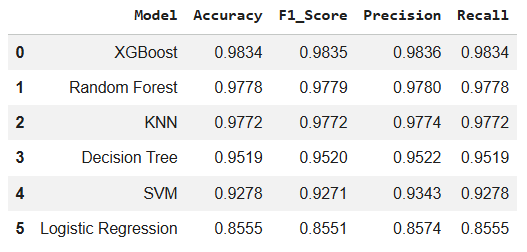

XGBoost achieved the highest baseline performance across all metrics before tuning followed closely by Random Forest and KNN

SVM and Logistic Regression lagged behind in terms of accuracy and F1-score suggesting suboptimal hyperparameters

Decision Tree showed reasonable performance but is prone to overfitting in raw form

### **3. SVM Performance After Grid Search**

After performing Grid Search hyperparameter tuning for SVM (optimizing C, gamma and kernel) the performance improved significantly:

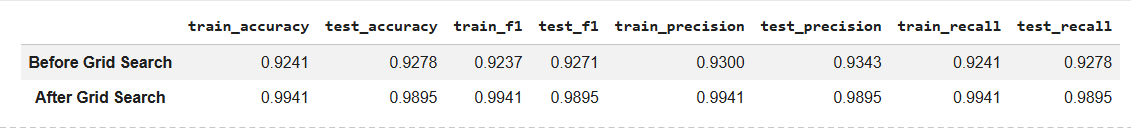



Hyperparameter tuning dramatically improved SVM performance surpassing all other models including XGBoost

The high F1-score indicates a strong balance between Precision and Recall which is critical for most classification tasks

Grid Search enabled the SVM to better handle the underlying data distribution by selecting the optimal regularization (C=100) and kernel parameters (gamma=0.1)

### **4. Model Selection**

SVM after Grid Search is the primary recommendation for production deployment as it provides the highest accuracy and F1-score indicating robust generalization and balanced performance

XGBoost could be considered as a secondary model if training time or interpretability is a priority as it performs well without extensive tuning

In [51]:
# Save SVM_Winner Model
joblib.dump(svm_winner,"svm_winner.pkl")

['svm_winner.pkl']

## **Video Annotation Pipeline Using MediaPipe and SVM**

In [52]:
!pip install mediapipe==0.10.14

In [53]:
COLAB           = True
INPUT_VIDEO     = "input_video.mp4"
OUTPUT_VIDEO    = "output_annotated.mp4"
MODEL_PATH      = "svm_winner.pkl"

MAX_HANDS            = 2
MIN_DETECT_CONF      = 0.7
MIN_TRACK_CONF       = 0.6
MIN_PROBA_SHOW       = 0.3    # only show label when confidence >= this value
SMOOTH_WINDOW        = 10
LABEL_PERSIST_FRAMES = 8
FONT_SCALE  = 0.85
THICKNESS   = 2



import subprocess, sys
def _pip(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pkg])

if COLAB:
    for _pkg in ("mediapipe", "opencv-python-headless"):
        try:
            __import__(_pkg.replace("-headless", "").replace("-", "_"))
        except ImportError:
            _pip(_pkg)

import cv2
import mediapipe as mp
import numpy as np
import joblib
import os
import time
from collections import deque, Counter


mp_hands   = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

def _load_joblib(path, label):
    if path and os.path.exists(path):
        obj = joblib.load(path)
        print(f"  [OK] {label:<20} loaded from '{path}'")
        return obj
    print(f"  [--] {label:<20} NOT found at '{path}'")
    return None

print("\n── Loading model files ──────────────────────────────")

model = _load_joblib(MODEL_PATH, "SVM model")
USE_MODEL = model is not None

if USE_MODEL:
    print("  [OK] Gesture prediction ENABLED  (raw string labels, no LabelEncoder, no scaler)")
else:
    print("  [--] Gesture prediction DISABLED  (landmark drawing only)")
print("─────────────────────────────────────────────────────\n")




class PredictionSmoother:
    """
    Keeps a rolling window of recent (label, proba) predictions per hand.
    Returns the majority-vote label and the average probability of that label.
    Prevents a single noisy frame from flipping the displayed gesture.
    """
    def __init__(self, window=10, persist=8):
        self.window      = window
        self.persist     = persist
        self.history     = [deque(maxlen=window), deque(maxlen=window)]
        self.last_label  = [None, None]
        self.last_proba  = [0.0,  0.0]
        self.frames_gone = [0,    0]

    def update(self, hand_idx, label, proba):
        self.history[hand_idx].append((label, proba))
        self.frames_gone[hand_idx] = 0
        labels = [l for l, _ in self.history[hand_idx]]
        winner = Counter(labels).most_common(1)[0][0]
        avg_p  = np.mean([p for l, p in self.history[hand_idx] if l == winner])
        self.last_label[hand_idx] = winner
        self.last_proba[hand_idx] = float(avg_p)
        return winner, float(avg_p)

    def get_persisted(self, hand_idx):
        self.frames_gone[hand_idx] += 1
        if (self.last_label[hand_idx] is not None
                and self.frames_gone[hand_idx] <= self.persist):
            return self.last_label[hand_idx], self.last_proba[hand_idx]
        return None, 0.0

    def reset_hand(self, hand_idx):
        self.history[hand_idx].clear()
        self.last_label[hand_idx]  = None
        self.last_proba[hand_idx]  = 0.0
        self.frames_gone[hand_idx] = 0

smoother = PredictionSmoother(window=SMOOTH_WINDOW, persist=LABEL_PERSIST_FRAMES)





def preprocess_hand(hand_landmarks):
    """
    Replicates the preprocessing from Project_ML.ipynb Cell 16:

      1. Extract (x, y, z) for all 21 landmarks → shape (21, 3).
      2. Recenter: subtract wrist (landmark index 0) x,y from every landmark's
         x,y (including the wrist itself, which then becomes 0,0).
      3. Normalise: compute Euclidean distance from origin to landmark index 12
         (mid-finger tip) using the already-recentered coordinates, then divide
         every landmark's x,y by that distance.
         → matches notebook: scale = sqrt(x13² + y13²) on the recentered data.
      4. Flatten (21, 3) → (63,)  — z is kept, no StandardScaler applied.

    Returns float32 array of shape (63,), or None if the hand is invalid.
    """
    # Step 1 — extract
    arr = np.array(
        [[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark],
        dtype=np.float32
    )

    if not np.isfinite(arr).all():
        return None

    arr[:, 0] -= arr[0, 0]
    arr[:, 1] -= arr[0, 1]

    scale = float(np.sqrt(arr[12, 0] ** 2 + arr[12, 1] ** 2))
    if scale < 1e-6:
        return None
    arr[:, 0] /= scale
    arr[:, 1] /= scale

    return arr.flatten().astype(np.float32)



def predict_raw(features):
    """
    Feed 63 features directly into the model.
    The SVM was trained on raw string labels → model.predict() returns the
    gesture name string directly.  No LabelEncoder, no StandardScaler.

    Returns (label_str, proba_float).
    """
    try:
        x         = features.reshape(1, -1)
        label_str = model.predict(x)[0]

        # Confidence estimate
        if hasattr(model, "predict_proba"):
            proba = float(model.predict_proba(x).max())
        elif hasattr(model, "decision_function"):
            scores = model.decision_function(x).ravel()
            exp    = np.exp(scores - scores.max())
            proba  = float(exp.max() / exp.sum())
        else:
            proba  = 1.0

        return label_str, proba
    except Exception:
        return "Unknown", 0.0



HAND_COLORS = [
    (0,   220, 100),   # green  — hand 0
    (0,   165, 255),   # orange — hand 1
]

def draw_landmarks(frame, hand_landmarks, hand_idx=0):
    color = HAND_COLORS[hand_idx % len(HAND_COLORS)]
    mp_drawing.draw_landmarks(
        frame, hand_landmarks, mp_hands.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=color,           thickness=2, circle_radius=4),
        mp_drawing.DrawingSpec(color=(220, 220, 220), thickness=1, circle_radius=2),
    )


def draw_gesture_label(frame, label, proba, hand_landmarks, hand_idx=0, faded=False):
    h, w  = frame.shape[:2]
    wrist = hand_landmarks.landmark[0]
    cx    = int(np.clip(wrist.x * w,       5,  w - 220))
    cy    = int(np.clip(wrist.y * h - 25, 30,  h -  10))
    color = HAND_COLORS[hand_idx % len(HAND_COLORS)]
    if faded:
        color = tuple(int(c * 0.5) for c in color)
    text = f"{label}  {proba:.0%}"
    cv2.putText(frame, text, (cx+1, cy+1),
                cv2.FONT_HERSHEY_SIMPLEX, FONT_SCALE, (0,0,0), THICKNESS+2, cv2.LINE_AA)
    cv2.putText(frame, text, (cx, cy),
                cv2.FONT_HERSHEY_SIMPLEX, FONT_SCALE, color,  THICKNESS,   cv2.LINE_AA)


def draw_hud(frame, frame_num, total_frames, fps, n_hands):
    lines = [
        f"Frame: {frame_num}/{total_frames}   Speed: {fps:5.1f} fps",
        f"Hands detected: {n_hands}",
    ]
    for i, text in enumerate(lines):
        y = 30 + i * 28
        cv2.putText(frame, text, (10, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0,0,0),       3, cv2.LINE_AA)
        cv2.putText(frame, text, (10, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255,255,255),  1, cv2.LINE_AA)


def draw_progress_bar(frame, frame_num, total_frames):
    h, w  = frame.shape[:2]
    bar_w = int(w * frame_num / max(total_frames, 1))
    cv2.rectangle(frame, (0, h-8), (w, h),     (50, 50, 50),  -1)
    cv2.rectangle(frame, (0, h-8), (bar_w, h), (0, 200, 100), -1)



def process_frame(frame, hands_model, prev_n_hands):
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    rgb.flags.writeable = False
    results = hands_model.process(rgb)
    rgb.flags.writeable = True

    n_hands = 0

    if results.multi_hand_landmarks:
        n_hands = len(results.multi_hand_landmarks)

        for hand_idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
            draw_landmarks(frame, hand_landmarks, hand_idx)

            if USE_MODEL:
                features = preprocess_hand(hand_landmarks)
                if features is not None:
                    raw_label, raw_proba = predict_raw(features)
                    stable_label, stable_proba = smoother.update(
                        hand_idx, raw_label, raw_proba
                    )
                    if stable_proba >= MIN_PROBA_SHOW:
                        draw_gesture_label(
                            frame, stable_label, stable_proba,
                            hand_landmarks, hand_idx, faded=False
                        )

    if USE_MODEL:
        for hand_idx in range(prev_n_hands):
            if hand_idx >= n_hands:
                p_label, p_proba = smoother.get_persisted(hand_idx)
                if p_label is None:
                    smoother.reset_hand(hand_idx)

    return frame, n_hands



def process_video(input_path, output_path):
    if not os.path.exists(input_path):
        raise FileNotFoundError(
            f"Input video not found: '{input_path}'\n"
            "Upload your video and set INPUT_VIDEO correctly."
        )

    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        raise RuntimeError(f"Cannot open video: '{input_path}'")

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps          = cap.get(cv2.CAP_PROP_FPS) or 30.0
    fw           = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fh           = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    print(f"── Input video ──────────────────────────────────────")
    print(f"  File       : {input_path}")
    print(f"  Size       : {fw} × {fh}")
    print(f"  FPS        : {fps:.2f}")
    print(f"  Frames     : {total_frames}")
    print(f"  Duration   : {total_frames/fps:.1f} seconds")
    print(f"  Output     : {output_path}")
    print(f"  Smoothing  : majority vote over last {SMOOTH_WINDOW} frames")
    print(f"  Min conf   : {MIN_PROBA_SHOW:.0%} to show label")
    print(f"─────────────────────────────────────────────────────\n")
    print("Processing ...\n")

    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    writer = cv2.VideoWriter(output_path, fourcc, fps, (fw, fh))
    if not writer.isOpened():
        raise RuntimeError(f"VideoWriter failed for '{output_path}'")

    frame_num    = 0
    hands_total  = 0
    prev_n_hands = 0
    t_start      = time.time()

    with mp_hands.Hands(
        static_image_mode        = False,
        max_num_hands            = MAX_HANDS,
        min_detection_confidence = MIN_DETECT_CONF,
        min_tracking_confidence  = MIN_TRACK_CONF,
    ) as hands:

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            frame_num  += 1
            frame, n_hands = process_frame(frame, hands, prev_n_hands)
            hands_total   += n_hands
            prev_n_hands   = n_hands

            elapsed = time.time() - t_start
            fps_now = frame_num / max(elapsed, 1e-9)

            draw_hud(frame, frame_num, total_frames, fps_now, n_hands)
            draw_progress_bar(frame, frame_num, total_frames)
            writer.write(frame)

            if frame_num % 10 == 0 or frame_num == total_frames:
                pct      = frame_num / total_frames * 100
                eta_s    = (total_frames - frame_num) / max(fps_now, 1e-9)
                bar_done = int(pct / 5)
                bar      = "█" * bar_done + "░" * (20 - bar_done)
                print(
                    f"  [{bar}]  {pct:5.1f}%   "
                    f"frame {frame_num}/{total_frames}   "
                    f"ETA {eta_s:.0f}s",
                    end="\r", flush=True
                )

    cap.release()
    writer.release()

    elapsed_total = time.time() - t_start
    print(f"\n\n── Done ─────────────────────────────────────────────")
    print(f"  Frames processed : {frame_num}")
    print(f"  Total hands seen : {hands_total}")
    print(f"  Time taken       : {elapsed_total:.1f} seconds")
    print(f"  Output saved to  : '{output_path}'")
    print(f"─────────────────────────────────────────────────────\n")
    return output_path



def run_colab():
    from google.colab import files

    print("Step 1: Upload your video file ...")
    uploaded = files.upload()
    if not uploaded:
        print("[!] No file uploaded.")
        return

    input_path = list(uploaded.keys())[0]
    print(f"\n[OK] Received: '{input_path}'\n")

    output_path = process_video(input_path, OUTPUT_VIDEO)

    print("Step 3: Downloading annotated video ...")
    files.download(output_path)
    print(f"[OK] '{output_path}' downloaded.")


if __name__ == "__main__":
    if COLAB:
        run_colab()
    else:
        process_video(INPUT_VIDEO, OUTPUT_VIDEO)


── Loading model files ──────────────────────────────
  [OK] SVM model            loaded from 'svm_winner.pkl'
  [OK] Gesture prediction ENABLED  (raw string labels, no LabelEncoder, no scaler)
─────────────────────────────────────────────────────

Step 1: Upload your video file ...


Saving video2.mp4 to video2.mp4

[OK] Received: 'video2.mp4'

── Input video ──────────────────────────────────────
  File       : video2.mp4
  Size       : 1920 × 1080
  FPS        : 14.67
  Frames     : 779
  Duration   : 53.1 seconds
  Output     : output_annotated.mp4
  Smoothing  : majority vote over last 10 frames
  Min conf   : 30% to show label
─────────────────────────────────────────────────────

Processing ...



── Done ─────────────────────────────────────────────
  Frames processed : 779
  Total hands seen : 765
  Time taken       : 94.4 seconds
  Output saved to  : 'output_annotated.mp4'
─────────────────────────────────────────────────────

Step 3: Downloading annotated video ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[OK] 'output_annotated.mp4' downloaded.
